In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([
    0.00, 0.03, 0.05, 0.08, 0.10,
    0.13, 0.15, 0.18, 0.20, 0.23,
    0.25, 0.28, 0.30, 0.33, 0.35,
    0.38, 0.40, 0.43, 0.45, 0.48,
    0.50, 0.53, 0.55, 0.58, 0.60,
    0.63, 0.65, 0.68, 0.70, 0.73,
    0.75, 0.78, 0.80, 0.83, 0.85,
    0.88, 0.90, 0.93, 0.95, 1.00
]).reshape(-1, 1)
Y = np.array([
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    1, 1, 1, 1, 1,
    1, 1, 1, 1, 1,
    1, 1, 1, 1, 1,
    1, 1, 1, 1, 1
]).reshape(-1, 1)


In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_derivative(x):
    return x*(1-x)
def loss(y_true,y_pred):
    return np.mean((y_true-y_pred)**2)

In [ ]:
class multilayer_perceptron:
    def __init__(self):
        self.w_in = np.random.randn(1,3)
        self.w_hidden = np.random.randn(3,3)
        self.w_out = np.random.randn(3,1)

        self.b_in = np.zeros(3)
        self.b_hidden = np.zeros(3)
        self.b_out = np.zeros(1)

    def forward(self, x):
        self.h1 = np.dot(x, self.w_in) + self.b_in
        self.h1_act = sigmoid(self.h1)

        self.h2 = np.dot(self.h1_act, self.w_hidden) + self.b_hidden
        self.h2_act = sigmoid(self.h2)

        self.out = np.dot(self.h2_act, self.w_out) + self.b_out
        self.out_act = sigmoid(self.out)

        return self.out_act

    def train(self, x, y, epochs=100,lr=0.01):
        y = y.reshape(-1,1)
        acc_list=list()
        loss_list=list()
        for epoch in range(epochs):
            out_act = self.forward(x)
            loss_val = np.mean((y - out_act) ** 2)
            delta_out = (out_act - y) * sigmoid_derivative(out_act)
            delta_h2 = np.dot(delta_out, self.w_out.T) * sigmoid_derivative(self.h2_act)
            delta_h1 = np.dot(delta_h2, self.w_hidden.T) * sigmoid_derivative(self.h1_act)
            accuracy = np.mean((out_act > 0.5) == y)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss_val}")
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss_val}, Accuracy: {accuracy*100:.2f}%")
            acc_list.append(accuracy)
            loss_list.append(loss_val)
            self.w_out -= lr * np.dot(self.h2_act.T, delta_out)
            self.b_out -= lr * np.sum(delta_out, axis=0)
            self.w_hidden -= lr * np.dot(self.h1_act.T, delta_h2)
            self.b_hidden -= lr * np.sum(delta_h2, axis=0)
            self.w_in -= lr * np.dot(x.T, delta_h1)
            self.b_in -= lr * np.sum(delta_h1, axis=0)
        return acc_list,loss_list


In [5]:
model_1=multilayer_perceptron()
accuracy,loss=model_1.train(X.reshape(-1,1),Y,epochs=100,lr=0.01)

Epoch 1/100, Loss: 0.2577443324447467
Epoch 1/100, Loss: 0.2577443324447467, Accuracy: 50.00%
Epoch 2/100, Loss: 0.2566772924717083
Epoch 2/100, Loss: 0.2566772924717083, Accuracy: 50.00%
Epoch 3/100, Loss: 0.25569863649365293
Epoch 3/100, Loss: 0.25569863649365293, Accuracy: 50.00%
Epoch 4/100, Loss: 0.254801717101948
Epoch 4/100, Loss: 0.254801717101948, Accuracy: 50.00%
Epoch 5/100, Loss: 0.2539801345165279
Epoch 5/100, Loss: 0.2539801345165279, Accuracy: 50.00%
Epoch 6/100, Loss: 0.25322777824021486
Epoch 6/100, Loss: 0.25322777824021486, Accuracy: 50.00%
Epoch 7/100, Loss: 0.25253885623604033
Epoch 7/100, Loss: 0.25253885623604033, Accuracy: 50.00%
Epoch 8/100, Loss: 0.25190791336111557
Epoch 8/100, Loss: 0.25190791336111557, Accuracy: 50.00%
Epoch 9/100, Loss: 0.25132984075758
Epoch 9/100, Loss: 0.25132984075758, Accuracy: 50.00%
Epoch 10/100, Loss: 0.2507998778057393
Epoch 10/100, Loss: 0.2507998778057393, Accuracy: 50.00%
Epoch 11/100, Loss: 0.2503136081086185
Epoch 11/100, Los

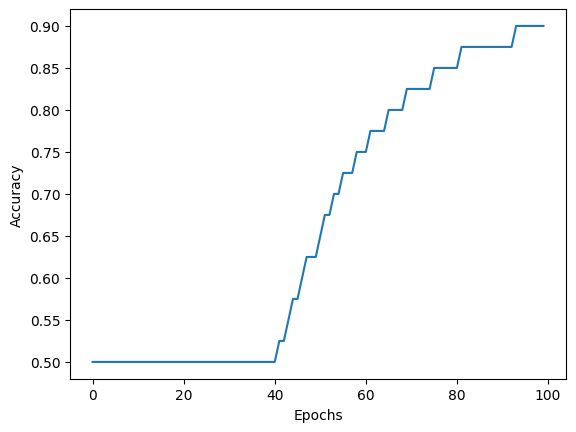

In [6]:
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


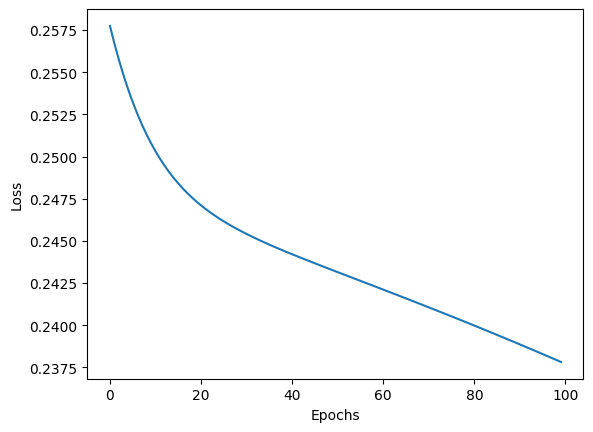

In [7]:
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()